![SUSS Logo](https://prod.suss.edu.sg/images/default-source/media-resources/01-singapore-university-of-social-sciences_horizontal-format_version-a_white-background_cmyk_72dpi.tmb-540_300.jpg?sfvrsn=11fe0b5a_0)

<h1><center>ANL252 TMA</center></h1>

In [3]:
#General Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import datetime as dt

#Indicate successful importing of libraries
print("Libraries imported.")

#Import and read csv Data file
DataFrame_name = pd.read_csv("TMA_Data.csv")

Libraries imported.


## Question 1(b)

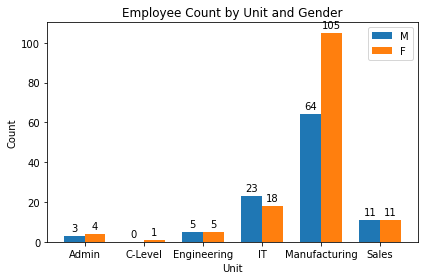

In [4]:
# Define labels for clustered bar chart
labels = ['Admin', 'C-Level', 'Engineering', 'IT', 'Manufacturing', 'Sales']
adminM = 0
clevelM = 0
engineeringM = 0
itM = 0
manufacturingM = 0
salesM = 0

adminF = 0
clevelF = 0
engineeringF = 0
itF = 0
manufacturingF = 0
salesF = 0

# Create a for-loop to count the number of employees in each unit by gender
for counter in range(0, len(DataFrame_name)):
    if DataFrame_name.loc[counter,'Gender'] == "M ":
        if DataFrame_name.loc[counter,'Unit'] == "Admin ":
            adminM = adminM + 1
        elif DataFrame_name.loc[counter,'Unit'] == "C-Level":
            clevelM = clevelM + 1
        elif DataFrame_name.loc[counter,'Unit'] == "Engineering":
            engineeringM = engineeringM + 1
        elif DataFrame_name.loc[counter,'Unit'] == "IT":
            itM = itM + 1
        elif DataFrame_name.loc[counter,'Unit'] == "Manufacturing":
            manufacturingM = manufacturingM + 1
        elif DataFrame_name.loc[counter,'Unit'] == "Sales":
            salesM = salesM + 1
    elif DataFrame_name.loc[counter,'Gender'] == "F":
        if DataFrame_name.loc[counter,'Unit'] == "Admin ":
            adminF = adminF + 1
        elif DataFrame_name.loc[counter,'Unit'] == "C-Level":
            clevelF = clevelF + 1
        elif DataFrame_name.loc[counter,'Unit'] == "Engineering":
            engineeringF = engineeringF + 1
        elif DataFrame_name.loc[counter,'Unit'] == "IT":
            itF = itF + 1
        elif DataFrame_name.loc[counter,'Unit'] == "Manufacturing":
            manufacturingF = manufacturingF + 1
        elif DataFrame_name.loc[counter,'Unit'] == "Sales":
            salesF = salesF + 1
m_count = [adminM, clevelM, engineeringM, itM, manufacturingM, salesM]
f_count = [adminF, clevelF, engineeringF, itF, manufacturingF, salesF]

# Label locations
x = np.arange(len(labels))
# Set bar width
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, m_count, width, label='M')
rects2 = ax.bar(x + width/2, f_count, width, label='F')

# Define labels, title and other bar chart parameters
ax.set_ylabel('Count')
ax.set_xlabel('Unit')
ax.set_title('Employee Count by Unit and Gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

0 PerformanceScore
Exceed        NaN
Meet          NaN
PIP           1.0
To Improve    NaN
Name: 0, dtype: float64
1 PerformanceScore
Exceed         NaN
Meet          0.25
PIP           0.25
To Improve    0.50
Name: 1, dtype: float64
2 PerformanceScore
Exceed        0.107143
Meet          0.821429
PIP                NaN
To Improve    0.071429
Name: 2, dtype: float64
3 PerformanceScore
Exceed        0.1125
Meet          0.8250
PIP              NaN
To Improve    0.0625
Name: 3, dtype: float64
4 PerformanceScore
Exceed        0.148148
Meet          0.802469
PIP                NaN
To Improve    0.049383
Name: 4, dtype: float64


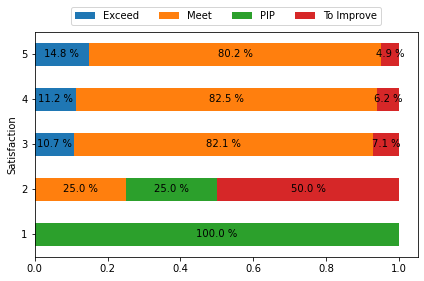

In [5]:
# Define X and Y variables
x_var, y_var = "Satisfaction", "PerformanceScore"

# Group data in Y by X, count entries and normalise entries
DataFrame_name_grouped = DataFrame_name.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)

# Using panda function to plot data in a stacked bar chart
DataFrame_name_grouped.plot.barh(stacked=True)

# Plot legend box
plt.legend(
    bbox_to_anchor=(0.5, 1.03), 
    loc="lower center", 
    borderaxespad=0, 
    frameon=True, 
    ncol=50, 
) 
# Create a for loop to print data text labels on chart
for ix, row in DataFrame_name_grouped.reset_index(drop=True).iterrows(): 
    print(ix, row) 
    cumulative = 0 
    for element in row: 
        if not pd.isna(element): 
            plt.text( 
                cumulative + element / 2, 
                ix, 
                f"{round(float(element * 100),1)} %", 
                va="center", 
                ha="center", 
                )  
            cumulative += element 
             
# Centralise the chart         
plt.tight_layout()

## Question 1(c)

In [6]:
# Convert Object Datatype to Datetime datatype
DataFrame_name['JoinDate'] = pd.to_datetime(DataFrame_name['JoinDate'])
DataFrame_name['LeftDate'] = pd.to_datetime(DataFrame_name['LeftDate'])

# Create variable and assign the Datetime value of 1st May 2022
date1 = dt.datetime.strptime('2022/5/1', "%Y/%m/%d")

# Create variable of minimum, maximum and average length of service
minLength = 0
maxLength = 0
totalLength = 0

# For loop to go through every row in the dataframe
for counter in range(0, len(DataFrame_name)):
    
    # Create variables and assign the Staff name, join date and left date from the TMA_Data.csv data.
    name = DataFrame_name.loc[counter,"Staff"]
    joinDate = DataFrame_name.loc[counter,"JoinDate"]
    leftDate = DataFrame_name.loc[counter,"LeftDate"]
    
    # If-else condition to find which staff leftdate that is empty
    if pd.isna(leftDate):
        # subtract the staff joindate from provided leftdate (1st May 2022), to 1 decimal place
        lengthOfService = round((date1 - joinDate).days / 365, 1)
    else:
        # subtract the joindate from leftdate, to 1 decimal place
        lengthOfService = round((leftDate - joinDate).days / 365, 1)
    
    # Assign the first staff length of service to minLength
    if minLength == 0:
        minLength = lengthOfService
    # If the next staff length of service is shorter then the previous, assign it to minLength
    elif minLength > lengthOfService:
        minLength = lengthOfService
    
    # If the next staff length of service is longer then the previous, assign it to maxLength
    if maxLength < lengthOfService:
        maxLength = lengthOfService
    
    # Retrieve the total lengthOfService
    totalLength = totalLength + lengthOfService
    
    # Print the staff name and length of service
    print(f"Name: {name} \nLength Of Service: {lengthOfService} Years\n")

# Divide the total length of service by total number of staff and round to the nearest 1 decimal place.
averageLength = round(totalLength/len(DataFrame_name),1)

# Print the minimum, maximum and average length of service
print(f"Minimum length of service: {minLength} Years")
print(f"Maximum length of service: {maxLength} Years")
print(f"Average length of service: {averageLength} Years")

Name: Aairah Hastings 
Length Of Service: 10.1 Years

Name: Aaminah Mcmillan 
Length Of Service: 8.0 Years

Name: Aamna Howell 
Length Of Service: 7.6 Years

Name: Aayan Ferrell 
Length Of Service: 6.3 Years

Name: Ace Potter 
Length Of Service: 9.2 Years

Name: Adaline Deacon 
Length Of Service: 1.3 Years

Name: Addie Terrell 
Length Of Service: 5.2 Years

Name: Adeeb Rice 
Length Of Service: 10.0 Years

Name: Aleena Sierra 
Length Of Service: 10.9 Years

Name: Alena Galvan 
Length Of Service: 7.5 Years

Name: Alfie Hibbert 
Length Of Service: 9.7 Years

Name: Allison Byers 
Length Of Service: 7.1 Years

Name: Amarah Morris 
Length Of Service: 7.2 Years

Name: Amy Jennings 
Length Of Service: 12.8 Years

Name: Anabel Stevens 
Length Of Service: 9.1 Years

Name: Anaya Fischer 
Length Of Service: 11.1 Years

Name: Anees Wallis 
Length Of Service: 7.9 Years

Name: Anish Hoover 
Length Of Service: 7.3 Years

Name: Anish Patton 
Length Of Service: 8.6 Years

Name: Annabell Rivers 
Length O

## Question 1(d)

In [8]:
# Create a boolean 'True' variable
loop = True

# Create a User-defined function to search for the staff name in the "TMA_Data.csv" data
def name_search (staffName):
    #For loop to go through every row in the "TMA_Data.csv" data
    for counter in range(0, len(DataFrame_name)):
        #If the staff name is found in the "TMA_Data.csv" data, return true.
        #Using .lower() to change the string to lower case due to case sensitivity.
        if DataFrame_name.loc[counter,'Staff'].lower() == staffName.lower():
            return True
        #If the staff name is not found in the "TMA_Data.csv" data, return false
    return False

# Create a while loop to allow user to continue another query. The loop terminates when the variable 'loop' is assigned with false.
while loop:
    # Create a boolean 'True' variable
    query = True
    
    # User to input the staff name
    name = input("Please enter the staff name: ")
    
    # Using the User-defined function as the if-else condition
    if name_search(name) == True:
        print(f"Yes. {name} is a staff of this organization.")
    else:
        print("Staff not found.")
    
    # Using a while loop for user to choose either to continue or exit.
    while query:
        # User to input choice to continue or exit
        a = input("Continue Y/N? ")
        # Condition for continuing the loop
        if a.lower() == "y":
            query = False
        # If user inputs 'N', the the variable 'query' and 'loop' will change to false thus exiting the while loop and the program ends.
        elif a.lower() == "n":
            query = False
            loop = False
        # If user input is other than 'Y' or 'N', the loop continues and prints "invalid selection".
        else:
            print("Invalid selection.")

Please enter the staff name: Anaya Fischer
Yes. Anaya Fischer is a staff of this organization.
Continue Y/N? Y
Please enter the staff name: anaya fischer
Yes. anaya fischer is a staff of this organization.
Continue Y/N? Y
Please enter the staff name: Anaya
Staff not found.
Continue Y/N? N
